In [3]:
from GetData.read_data import get_stock_data

In [4]:
Yum = get_stock_data('YUM')

In [5]:
print(Yum)

             Open     High      Low  Close     Volume  Ex-Dividend  \
Date                                                                 
2017-01-03  63.56  63.7899  62.8200  63.21  4793381.0          0.0   
2017-01-04  63.15  63.7950  63.0700  63.44  2835207.0          0.0   
2017-01-05  63.35  63.7700  63.1800  63.65  4040016.0          0.0   
2017-01-06  63.65  64.8300  63.3800  64.42  2863835.0          0.0   
2017-01-09  64.38  64.8500  64.3300  64.60  1944170.0          0.0   
2017-01-10  64.76  65.1750  64.6600  64.98  2560696.0          0.0   
2017-01-11  64.48  64.7200  64.2300  64.49  1267956.0          0.3   
2017-01-12  64.26  64.8100  64.1600  64.66  1049863.0          0.0   
2017-01-13  64.70  64.8900  64.4200  64.66  1557714.0          0.0   
2017-01-17  64.26  64.6900  63.9650  64.17  1595993.0          0.0   
2017-01-18  64.44  64.5500  64.0150  64.36  1632668.0          0.0   
2017-01-19  64.61  64.6400  63.8290  64.03  1551286.0          0.0   
2017-01-20  64.20  6

In [7]:
Yum.Open.describe()
Yum.index

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-19',
               '2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23',
               '2018-03-26', '2018-03-27'],
              dtype='datetime64[ns]', name='Date', length=309, freq=None)

In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import quandl

In [10]:
fit = np.polyfit(pd.to_numeric(Yum.index),Yum.Open, deg=3)

In [11]:
y = np.polyval(fit, pd.to_numeric(Yum.index))


C:\ProgramData\Miniconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


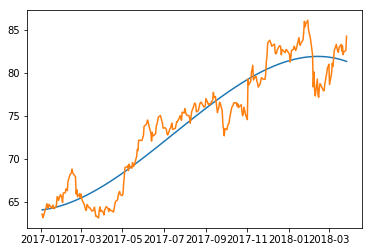

In [12]:
plt.plot(Yum.index, y)
plt.plot(Yum.index, Yum.Open)

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\ProgramData\Miniconda3\lib\site-packages\numpy\lib\polynomial.py:626: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\P

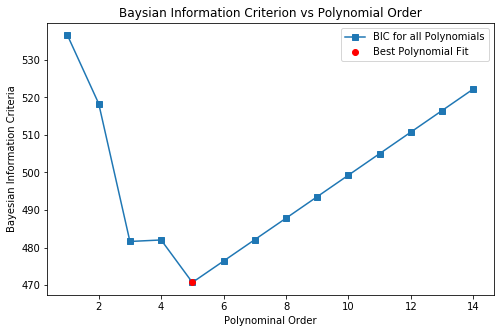

In [14]:
orders = np.arange(1, 15)
SS_list = np.zeros(len(orders))
n = len(pd.to_numeric(Yum.index))

for i in range(len(orders)):
    y_hat = np.polyval(np.polyfit(pd.to_numeric(Yum.index), Yum.Open, orders[i]), pd.to_numeric(Yum.index))
    SS_list[i] = np.sum((y_hat - Yum.Open)**2)/n

# Bayesian Information Criteria (BIC).
BIC = n*np.log(SS_list) + orders*np.log(n) 

best_poly = np.min(BIC)
best_p_index = np.argmin(BIC)

plt.figure(10, figsize=(8, 5))
plt.title('Baysian Information Criterion vs Polynomial Order')
plt.ylabel('Bayesian Information Criteria'), plt.xlabel('Polynominal Order')
plt.plot(orders, BIC,'s-', label='BIC for all Polynomials')
plt.plot(orders[best_p_index], best_poly, 'ro', label='Best Polynomial Fit')
plt.legend(loc=1)
plt.show()